# Hands-on Linear SVM for Binary Classification

## Dataset Information
+ num of classes: 2
+ num of data: 6,414 / 26,147 (testing)
+ num of features: 123 / 123 (testing) 

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year. 

[Dataset Details](http://archive.ics.uci.edu/ml/datasets/Adult)

[Dataset Source](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html)

## Configuration

In [1]:
import os
import numpy as np
import sklearn
import pprint
from sklearn.datasets import load_svmlight_file
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
DATA_PATH = '../data/'
TRAIN_FILE = 'a5a.txt'
TEST_FILE = 'a5a.t.txt'
N_FEATURES = 123
K_FOLD = 3
C_values = [0.01, 0.1, 1, 10, 100]

## 1. Load Data
+ [sklearn.datasets.load_svmlight_file](https://scikit-learn.org/stable/modules/cross_validation.html)

In [3]:
for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        if filename.endswith('.txt'):
            print(os.path.join(dirname, filename))

../data/a5a.t.txt
../data/a5a.txt


In [4]:
def get_data(filename):
    data = load_svmlight_file(filename, n_features = N_FEATURES)
    return data[0], data[1]

In [42]:
X_train, y_train = get_data(DATA_PATH + TRAIN_FILE)
X_test, y_test = get_data(DATA_PATH + TEST_FILE)

In [43]:
print(f'Training set has {X_train.shape} data')
print(f'Test set has {X_test.shape} data')
np.set_printoptions(edgeitems=1e9)
X_train_printable = X_train.todense()
print(type(X_train))

Training set has (6414, 123) data
Test set has (26147, 123) data
<class 'scipy.sparse.csr.csr_matrix'>


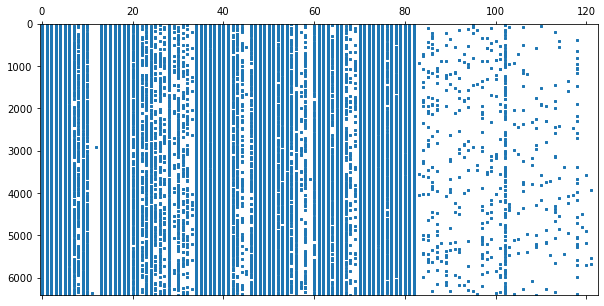

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.spy(X_train, markersize=2, aspect='auto')
plt.savefig('sparse_x_train.png', dpi=160)

In [54]:
print(X_train[1])
print(y_train[1])

  (0, 2)	1.0
  (0, 5)	1.0
  (0, 16)	1.0
  (0, 21)	1.0
  (0, 35)	1.0
  (0, 40)	1.0
  (0, 52)	1.0
  (0, 63)	1.0
  (0, 66)	1.0
  (0, 72)	1.0
  (0, 73)	1.0
  (0, 75)	1.0
  (0, 79)	1.0
  (0, 82)	1.0
-1.0


## 2. K-Fold CV LinearSVC
Libraries
+ [sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)
+ [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
+ [Cross Validation Details](https://scikit-learn.org/stable/modules/cross_validation.html)

In [8]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=3)

In [9]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.01)


In [10]:
from sklearn import metrics
clf2 = svm.SVC(kernel='linear', C=1)
scores2 = cross_val_score(clf2, X_train, y_train, cv=3, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

Accuracy: 0.77 (+/- 0.01)


In [11]:
for c_ in C_values:
    clf = svm.SVC(kernel='linear', C=c_)
    scores = cross_val_score(clf, X_train, y_train, cv=K_FOLD)
    print("C: %0.2f Accuracy: %0.5f (+/- %0.5f)" % (c_, scores.mean(), scores.std() * 2))

C: 0.01 Accuracy: 0.83474 (+/- 0.00911)
C: 0.10 Accuracy: 0.84082 (+/- 0.01235)
C: 1.00 Accuracy: 0.83941 (+/- 0.01149)
C: 10.00 Accuracy: 0.83895 (+/- 0.00955)
C: 100.00 Accuracy: 0.83879 (+/- 0.00905)


In [12]:
for c_ in C_values:
    clf = svm.LinearSVC(C=c_, max_iter=50000)
    scores = cross_val_score(clf, X_train, y_train, cv=K_FOLD)
    
    print("C: %0.2f Accuracy: %0.5f (+/- %0.5f)" % (c_, scores.mean(), scores.std() * 2))

C: 0.01 Accuracy: 0.83957 (+/- 0.01153)
C: 0.10 Accuracy: 0.84222 (+/- 0.01228)
C: 1.00 Accuracy: 0.83801 (+/- 0.00817)
C: 10.00 Accuracy: 0.83645 (+/- 0.00841)
C: 100.00 Accuracy: 0.83630 (+/- 0.00861)


In [57]:
accuracies = dict.fromkeys(C_values)
for c_ in C_values:
    clf = svm.LinearSVC(C=c_, max_iter=60000) #60,000 to avoid convergence warning
    scores = cross_val_score(clf, X_train, y_train, cv=K_FOLD, scoring='accuracy')
    accuracies[c_] = scores.mean()
    print("C: %0.2f Accuracy: %0.5f (+/- %0.5f)" % (c_, scores.mean(), scores.std() * 2))    

C: 0.01 Accuracy: 0.83957 (+/- 0.01153)
C: 0.10 Accuracy: 0.84222 (+/- 0.01228)
C: 1.00 Accuracy: 0.83801 (+/- 0.00817)
C: 10.00 Accuracy: 0.83645 (+/- 0.00841)
C: 100.00 Accuracy: 0.83630 (+/- 0.00861)


In [58]:
accuracies = dict.fromkeys(C_values)
for c_ in C_values:
    clf = svm.LinearSVC(C=c_) #60,000 to avoid convergence warning
    scores = cross_val_score(clf, X_train, y_train, cv=K_FOLD, scoring='accuracy')
    accuracies[c_] = scores.mean()
    print("C: %0.2f Accuracy: %0.5f (+/- %0.5f)" % (c_, scores.mean(), scores.std() * 2))    

C: 0.01 Accuracy: 0.83957 (+/- 0.01153)
C: 0.10 Accuracy: 0.84222 (+/- 0.01228)
C: 1.00 Accuracy: 0.83801 (+/- 0.00817)


C:\Users\wackm\anaconda3\envs\ai6102ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C: 10.00 Accuracy: 0.83817 (+/- 0.00939)


C:\Users\wackm\anaconda3\envs\ai6102ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C: 100.00 Accuracy: 0.79732 (+/- 0.03390)


In [59]:
pprint.pprint(accuracies)
best_c = max(accuracies, key=accuracies.get)
print('Best value of C is ', best_c)

{0.01: 0.8395696913002807,
 0.1: 0.8422201434362333,
 1: 0.8380106018085437,
 10: 0.8381665107577175,
 100: 0.7973183660742126}
Best value of C is  0.1


### Part 3: Select best $c^*$ to train LinearSVC

In [60]:
svm_clf = svm.LinearSVC(C=best_c)
svm_clf.fit(X_train, y_train)
# predictions = svm_clf.predict(X_test)
accuracy = svm_clf.score(X_test, y_test)
print(f'Accuracy of LinearSVC with C: {best_c} is {accuracy}')

Accuracy of LinearSVC with C: 0.1 is 0.845871419283283
